<a id="99"></a>
# Python 6 Assignment
### Purpose: To Create and Evaluate a Least Squares Linear Regression Model using Statistical and Data Science Approaches
<b>Program Sections</b>
<ul><b>
<li><a href = "#0">Import Python Packages and Set Display</a></li>
<li><a href = "#1">Load the Data and Inspect Fields</a></li>
<li><a href = "#2">A Statistical Approach to Regression Modeling</a></b>
    <ul><i>
        <li><a href = "#20">Simple Linear Regression</a></li>
        <li><a href = "#21">Multiple Linear Regression</a></li>
        <li><a href = "#22">Multiple Linear Regression with Uncorrelated Features</a></li>
        <li><a href = "#23">Full Regression Model</a></li>
        <li><a href = "#24">Parsing the Model due to Multicollinearity</a></li>
        <li><a href = "#25">Parsing the Model due to Insignificant Features</a></li>
        <li><a href = "#26">Using the Final Model to Make Predictions</a></li>
    </i></ul>
</li><b>
<li><a href = "#3">A Data Science Approach to Regression Modeling</a></b>
    <ul><i>
        <li><a href = "#30">Load New Packages and Set Up Data</a></li>
        <li><a href = "#31">Refine Model and Identify Important Features</a></li>
        <li><a href = "#32">Utiltize Identified Features to Build and Evaluate Final Regression Model</a></li>
        <li><a href = "#33">Using the Final Model to Make Predictions</a></li>
    </i></ul>
</li><b>
<li><a href = "#4">Assignment Submission</a></li></ul>

<a id="0"></a>
### Import Python Packages and Set Display
<a href = "#99">Top</a>

In [1]:
# Code Block 0
import pandas as pd 
import seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import style

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import datetime, socket

In [2]:
# Code Block 1
# Set display to show up to 200 columns in dataframe
pd.set_option('display.max_columns', 200) 

# Set default color palette to colorblind
plt.style.use('seaborn-colorblind')

# Set the aesthetic style of any plots 
sns.set_style('whitegrid') 

<a id="1"></a>
### Load the Data and Inspect Fields
<a href = "#99">Top</a>

In [3]:
# Code Block 2
# Read CSV file from previous homework into dataframe
df_airbnb = pd.read_csv("Boston Airbnb Data with features.csv",encoding="latin1")

In [4]:
# Code Block 3
# Identify fields in dataframe
df_airbnb.columns

Index(['ID', 'Name', 'Host ID', 'Host Name', 'Host Since', 'Host Location',
       'Host Response Time', 'Host Response Rate', 'Host Acceptance Rate',
       'Host Is Superhost', 'Host Listings Count', 'Host Has Profile Pic',
       'Host Identity Verified', 'City', 'Property Type', 'Room Type',
       'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Price',
       'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People',
       'Minimum Nights', 'Number Of Reviews', 'First Review', 'Last Review',
       'Instant Bookable', 'Cancellation Policy', 'Reviews Per Month',
       'City Bins', 'superhost_Yes', 'verified_Yes', 'property_Apartment',
       'property_Bed & Breakfast', 'property_Boat', 'property_Condominium',
       'property_House', 'property_Loft', 'property_Townhouse',
       'property_Villa', 'room_Entire home/apt', 'room_Private room',
       'room_Shared room', 'bed_Airbed', 'bed_Couch', 'bed_Futon',
       'bed_Pull-out Sofa', 'bed_Real Bed', 'ins

In [5]:
# Code Block 4
# Show data type and missing data in fields
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3244 entries, 0 to 3243
Data columns (total 79 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           3244 non-null   int64  
 1   Name                         3244 non-null   object 
 2   Host ID                      3244 non-null   int64  
 3   Host Name                    3244 non-null   object 
 4   Host Since                   3244 non-null   object 
 5   Host Location                3234 non-null   object 
 6   Host Response Time           3244 non-null   object 
 7   Host Response Rate           2820 non-null   float64
 8   Host Acceptance Rate         2782 non-null   float64
 9   Host Is Superhost            3244 non-null   object 
 10  Host Listings Count          3244 non-null   int64  
 11  Host Has Profile Pic         3244 non-null   object 
 12  Host Identity Verified       3244 non-null   object 
 13  City              

<a id="2"></a>
### A Statistical Approach to Regression Modeling
##### The focus is on developing and understanding the relationships between features and the target variable
<a href = "#99">Top</a>

<a id="20"></a>
#### Simple Linear Regression

In [6]:
# Code Block 5
# Create a dataframe with all fields to be used in the regression
df_reg = df_airbnb[['Accommodates', 'Price']].copy()

# Drop rows that are not complete (i.e. have missing values)
df_reg.dropna(inplace=True)

# Set up target dataframe
y = df_reg[['Price']].copy()
y.reset_index(drop=True, inplace=True) 

# Set up features dataframe
X = df_reg.drop(['Price'], axis=1)
X.reset_index(drop=True, inplace=True) 

In [7]:
# Code Block 6
# Fit regression model on data
reg = sm.OLS(y, sm.add_constant(X)).fit()

# Create predictions and store in a list
pred = reg.predict(sm.add_constant(X)) 

# Create residuals in a list
resid = reg.resid

# Show summary statistics for regression
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     1441.
Date:                Thu, 11 Mar 2021   Prob (F-statistic):          3.81e-261
Time:                        09:45:10   Log-Likelihood:                -19029.
No. Observations:                3244   AIC:                         3.806e+04
Df Residuals:                    3242   BIC:                         3.807e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           55.4947      3.266     16.993      0.000      49.092      61.898
Accommodates    37.0974      0.977     37.954      0.000      35.181      39.014
==============================================================================
Omnibus:                     1054.148   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4614.816
Skew:                           1.521   Prob(JB):                         0.00
Kurtosis:                       7.989   Cond. No.                         7.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Figure size 1152x576 with 0 Axes>

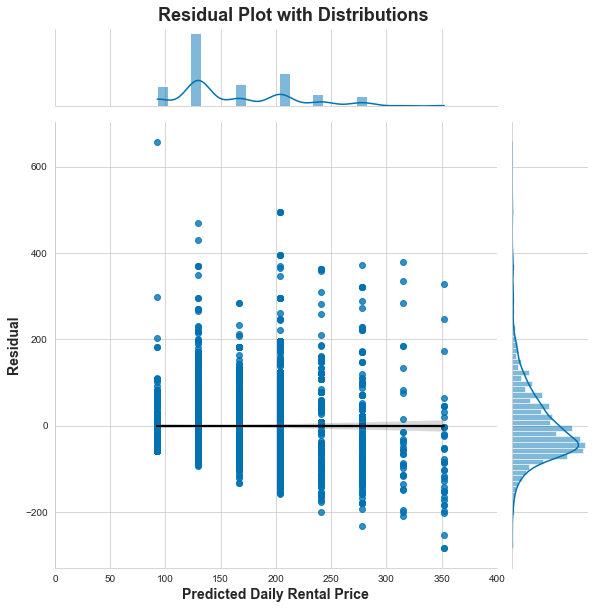

In [8]:
# Code Block 7
# Create plot of residuals and distributions
plt.figure(figsize=(16,8))
sns.jointplot(x=pred, y=resid, kind="reg", ratio=5, height=8, 
              line_kws={'color': 'black'})
plt.xlabel('Predicted Daily Rental Price', fontweight='bold', fontsize='14', ha='center')
plt.ylabel('Residual', fontweight='bold', fontsize='14', ha='center')
plt.suptitle('Residual Plot with Distributions       ',  fontweight='bold', 
          fontsize='18', ha='center', y=1.02)
plt.xlim(0,400)
plt.show()

<a id="21"></a>
#### Multiple Linear Regression

In [9]:
# Code Block 8
# Create a dataframe with all fields to be used in the regression
df_reg = df_airbnb[['Accommodates', 'Beds', 'Price']].copy()

# Drop rows that are not complete (i.e. have missing values)
df_reg.dropna(inplace=True)

# Set up target dataframe
y = df_reg[['Price']].copy()
y.reset_index(drop=True, inplace=True) 

# Set up features dataframe
X = df_reg.drop(['Price'], axis=1)
X.reset_index(drop=True, inplace=True) 

In [ ]:
# Code Block 9
# Fit regression model on data
reg = sm.OLS(y, sm.add_constant(X)).fit()

# Create predictions and store in a list
pred = reg.predict(sm.add_constant(X)) 

# Create residuals in a list
resid = reg.resid

# Show summary statistics for regression
reg.summary()

<Figure size 1152x576 with 0 Axes>

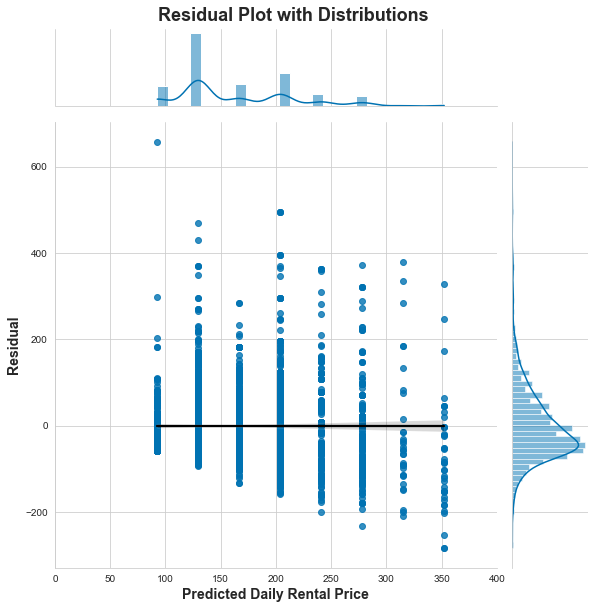

In [10]:
# Code Block 10
# Create plot of residuals and distributions
plt.figure(figsize=(16,8))
sns.jointplot(x=pred, y=resid, kind="reg", ratio=5, height=8, 
              line_kws={'color': 'black'})
plt.xlabel('Predicted Daily Rental Price', fontweight='bold', fontsize='14', ha='center')
plt.ylabel('Residual', fontweight='bold', fontsize='14', ha='center')
plt.suptitle('Residual Plot with Distributions       ',  fontweight='bold', 
          fontsize='18', ha='center', y=1.02)
plt.xlim(0,400)
plt.show()

In [11]:
# Code Block 11
# Evaluate Variance Inflation Factor for X features
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF Score"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Show VIF scores for features
round(vif, 1).sort_values(by='VIF Score', ascending=False)

,Feature,VIF Score
0,Accommodates,11.3
1,Beds,11.3


<a id="22"></a>
#### Multiple Linear Regression with Uncorrelated Features

In [12]:
# Code Block 12
# Create a dataframe with all fields to be used in the regression
df_reg = df_airbnb[['Accommodates', 'Cleaning Fee', 'Price']].copy()

# Drop rows that are not complete (i.e. have missing values)
df_reg.dropna(inplace=True)

# Set up target dataframe
y = df_reg[['Price']].copy()
y.reset_index(drop=True, inplace=True) 

# Set up features dataframe
X = df_reg.drop(['Price'], axis=1)
X.reset_index(drop=True, inplace=True) 

In [13]:
# Code Block 13
# Fit regression model on data
reg = sm.OLS(y, sm.add_constant(X)).fit()

# Create predictions and store in a list
pred = reg.predict(sm.add_constant(X)) 

# Create residuals in a list
resid = reg.resid

# Show summary statistics for regression
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     879.7
Date:                Thu, 11 Mar 2021   Prob (F-statistic):          6.56e-306
Time:                        09:47:30   Log-Likelihood:                -18922.
No. Observations:                3244   AIC:                         3.785e+04
Df Residuals:                    3241   BIC:                         3.787e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           53.9035      3.162     17.047      0.000      47.704      60.103
Accommodates    29.8434      1.064     28.042      0.000      27.757      31.930
Cleaning Fee     0.5410      0.036     14.869      0.000       0.470       0.612
==============================================================================
Omnibus:                     1183.769   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6310.895
Skew:                           1.655   Prob(JB):                         0.00
Kurtosis:                       8.978   Cond. No.                         140.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Figure size 1152x576 with 0 Axes>

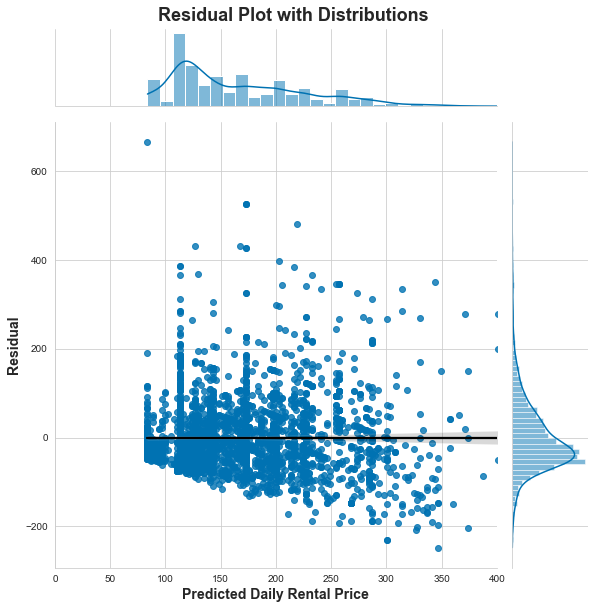

In [14]:
# Code Block 14
# Create plot of residuals and distributions
plt.figure(figsize=(16,8))
sns.jointplot(x=pred, y=resid, kind="reg", ratio=5, height=8, 
              line_kws={'color': 'black'})
plt.xlabel('Predicted Daily Rental Price', fontweight='bold', fontsize='14', ha='center')
plt.ylabel('Residual', fontweight='bold', fontsize='14', ha='center')
plt.suptitle('Residual Plot with Distributions       ',  fontweight='bold', 
          fontsize='18', ha='center', y=1.02)
plt.xlim(0,400)
plt.show()

In [15]:
# Code Block 15
# Evaluate Variance Inflation Factor for X features
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF Score"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Show VIF scores for features
round(vif, 1).sort_values(by='VIF Score', ascending=False)

,Feature,VIF Score
0,Accommodates,2.4
1,Cleaning Fee,2.4


<a id="23"></a>
#### Full Regression Model

In [16]:
# Code Block 16
# Create a dataframe with all fields to be used in the regression
df_reg = df_airbnb[['Host Response Rate', 'Host Acceptance Rate', 'Host Listings Count',
                    'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Security Deposit',
                    'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights', 
                    'Number Of Reviews', 'Reviews Per Month', 'superhost_Yes', 'verified_Yes',
                    'property_Bed & Breakfast', 'property_Boat', 'property_Condominium', 
                    'property_House', 'property_Loft', 'property_Townhouse', 'property_Villa',
                    'room_Private room', 'room_Shared room', 'bed_Airbed', 'bed_Couch',
                    'bed_Futon', 'bed_Pull-out Sofa', 'instabook_Yes', 'cancel_flexible',
                    'cancel_moderate', 'cancel_super_strict_30', 'citybins_Brookline',
                    'citybins_Cambridge', 'citybins_Charlestown', 'citybins_Jamaica Plain',
                    'citybins_Other', 'Host Response Time Code', 'Review Scores Rating',
                    'Review Scores Accuracy', 'Review Scores Cleanliness', 
                    'Review Scores Checkin', 'Review Scores Communication',
                    'Review Scores Location', 'Review Scores Value', 'Has Security Deposit',  
                    'Guests per Bed', 'Accommodates per Bathroom', 'Days Since Last Review',
                    'Near Fenway', 'Near Harbor', 'Near Historic', 'Price']].copy()

# Guests Not Included was removed due to linear dependency (related to Guests Included and Accommodates)
# Base levels for one-hot encoded features were removed (property_Apartment, room_Entire home/apt, bed_Real Bed,
# cancel_strict, and citybins_Boston. Object fields were not included.

# Drop rows that are not complete (i.e. have missing values)
df_reg.dropna(inplace=True)

# Set up target dataframe
y = df_reg[['Price']].copy()
y.reset_index(drop=True, inplace=True) 

# Set up features dataframe
X = df_reg.drop(['Price'], axis=1)
X.reset_index(drop=True, inplace=True) 

In [17]:
# Code Block 17
# Fit regression model on data
reg = sm.OLS(y, sm.add_constant(X)).fit()

# Create predictions and store in a list
pred = reg.predict(sm.add_constant(X)) 

# Create residuals in a list
resid = reg.resid

# Show summary statistics for regression
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     73.02
Date:                Thu, 11 Mar 2021   Prob (F-statistic):               0.00
Time:                        09:50:12   Log-Likelihood:                -12723.
No. Observations:                2306   AIC:                         2.555e+04
Df Residuals:                    2252   BIC:                         2.586e+04
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           1.2890     28.105      0.046      0.963     -53.825      56.403
Host Response Rate             12.2552     15.127      0.810      0.418     -17.409      41.919
Host Acceptance Rate            7.9173      8.924      0.887      0.375      -9.583      25.418
Host Listings Count             0.0116      0.013      0.914      0.361      -0.013       0.037
Accommodates                   25.5176      3.358      7.599      0.000      18.932      32.103
Bathrooms                       2.6917      6.204      0.434      0.664      -9.475      14.859
Bedrooms                       28.0789      3.041      9.235      0.000      22.116      34.041
Beds                            1.5838      4.125      0.384      0.701      -6.506       9.673
Security Deposit                0.0607      0.012      5.147      0.000       0.038       0.084
Cleaning Fee                    0.0459      0.042      1.100      0.271      -0.036       0.128
Guests Included                -0.7663      3.374     -0.227      0.820      -7.383       5.851
Extra People                    0.0059      0.082      0.072      0.942      -0.155       0.167
Minimum Nights                 -1.1516      0.367     -3.134      0.002      -1.872      -0.431
Number Of Reviews              -0.0372      0.038     -0.989      0.323      -0.111       0.037
Reviews Per Month              -3.1064      0.744     -4.174      0.000      -4.566      -1.647
superhost_Yes                   9.3691      3.840      2.440      0.015       1.839      16.899
verified_Yes                    3.3858      3.287      1.030      0.303      -3.061       9.833
property_Bed & Breakfast        4.0614     12.599      0.322      0.747     -20.645      28.768
property_Boat                  48.4533     20.215      2.397      0.017       8.811      88.096
property_Condominium           11.2210      5.193      2.161      0.031       1.038      21.404
property_House                -14.7466      3.964     -3.720      0.000     -22.520      -6.973
property_Loft                  33.4884     12.372      2.707      0.007       9.227      57.749
property_Townhouse             10.6308      9.977      1.065      0.287      -8.935      30.197
property_Villa                -13.2268     43.442     -0.304      0.761     -98.417      71.964
room_Private room             -69.1070      3.867    -17.873      0.000     -76.689     -61.525
room_Shared room              -80.3077     11.869     -6.766      0.000    -103.583     -57.033
bed_Airbed                    -17.5323     14.862     -1.180      0.238     -46.677      11.613
bed_Couch                       5.9676     31.838      0.187      0.851     -56.467      68.402
bed_Futon                     -21.2788     10.177     -2.091      0.037     -41.236      -1.322
bed_Pull-ou

<Figure size 1152x576 with 0 Axes>

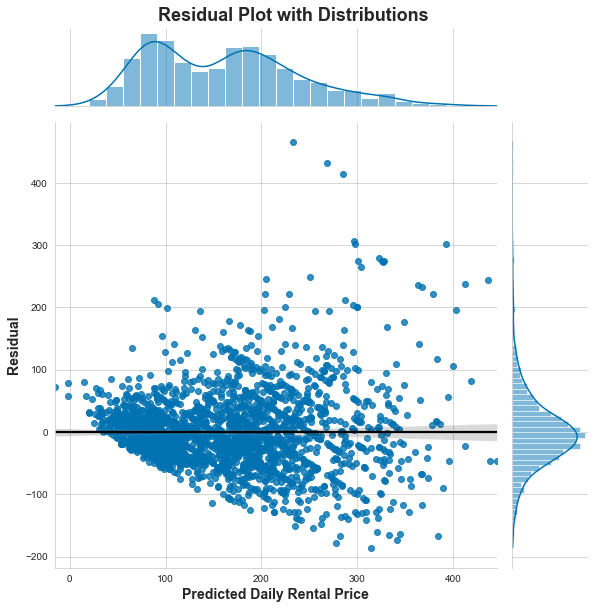

In [18]:
# Code Block 18
# Create plot of residuals and distributions
plt.figure(figsize=(16,8))
sns.jointplot(x=pred, y=resid, kind="reg", ratio=5, height=8, 
              line_kws={'color': 'black'})
plt.xlabel('Predicted Daily Rental Price', fontweight='bold', fontsize='14', ha='center')
plt.ylabel('Residual', fontweight='bold', fontsize='14', ha='center')
plt.suptitle('Residual Plot with Distributions       ',  fontweight='bold', 
          fontsize='18', ha='center', y=1.02)
plt.show()

In [19]:
# Code Block 19
# Evaluate Variance Inflation Factor for X features
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF Score"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Show features with VIF above 5
index_names = vif[vif['VIF Score'] < 5 ].index
vif.drop(index_names, inplace=True)
round(vif, 1).sort_values(by='VIF Score', ascending=False)

,Feature,VIF Score
39,Review Scores Rating,373.5
42,Review Scores Checkin,259.5
45,Review Scores Value,218.1
40,Review Scores Accuracy,199.0
43,Review Scores Communication,173.5
41,Review Scores Cleanliness,151.2
44,Review Scores Location,123.7
0,Host Response Rate,93.8
3,Accommodates,78.0
48,Accommodates per Bathroom,52.3


<a id="24"></a>
#### Parsing the Model due to Multicollinearity

In [21]:
# Code Block 20
# Drop top offending variable based on VIF analysis
X = X.drop(['Review Scores Rating'], axis=1)

In [22]:
# Code Block 21
# Evaluate Variance Inflation Factor for X features
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF Score"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Show features with VIF above 5
index_names = vif[vif['VIF Score'] < 5 ].index
vif.drop(index_names, inplace=True)
round(vif, 1).sort_values(by='VIF Score', ascending=False)

,Feature,VIF Score
41,Review Scores Checkin,254.3
39,Review Scores Accuracy,193.7
44,Review Scores Value,177.2
42,Review Scores Communication,166.6
40,Review Scores Cleanliness,127.9
43,Review Scores Location,121.9
0,Host Response Rate,93.8
3,Accommodates,77.9
47,Accommodates per Bathroom,52.2
4,Bathrooms,35.6


In [23]:
# Code Block 22
# The process was variable by variable. The features listed below constitute the series 
# of features that were dropped one at a time during that process. This process can take
# some time, so it was executed for you.
X = X.drop(['Review Scores Checkin', 'Review Scores Accuracy', 'Review Scores Value',
            'Review Scores Communication', 'Review Scores Location', 
            'Accommodates', 'Host Response Rate', 'Review Scores Cleanliness', 'Beds', 
            'Host Acceptance Rate', 'Guests Included', 'Bathrooms'], axis=1)

In [24]:
# Code Block 23
# Fit regression model on data after all correlated fetaures were removed
reg = sm.OLS(y, sm.add_constant(X)).fit()

# Create predictions and store in a list
pred = reg.predict(sm.add_constant(X)) 

# Create residuals in a list
resid = reg.resid

# Show summary statistics for regression
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     82.50
Date:                Thu, 11 Mar 2021   Prob (F-statistic):               0.00
Time:                        09:55:47   Log-Likelihood:                -12840.
No. Observations:                2306   AIC:                         2.576e+04
Df Residuals:                    2265   BIC:                         2.600e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       139.7896      7.325     19.084      0.000     125.425     154.154
Host Listings Count           0.0294      0.013      2.344      0.019       0.005       0.054
Bedrooms                     50.1903      2.410     20.822      0.000      45.463      54.917
Security Deposit              0.0614      0.012      4.982      0.000       0.037       0.086
Cleaning Fee                  0.1494      0.043      3.475      0.001       0.065       0.234
Extra People                  0.1374      0.084      1.642      0.101      -0.027       0.301
Minimum Nights               -1.4061      0.383     -3.673      0.000      -2.157      -0.655
Number Of Reviews            -0.0467      0.039     -1.191      0.234      -0.124       0.030
Reviews Per Month            -2.4089      0.764     -3.152      0.002      -3.907      -0.910
superhost_Yes                14.3854      3.898      3.690      0.000       6.740      22.030
verified_Yes                  4.1983      3.414      1.230      0.219      -2.498      10.894
property_Bed & Breakfast     10.1381     13.145      0.771      0.441     -15.639      35.915
property_Boat                56.5246     20.780      2.720      0.007      15.775      97.274
property_Condominium         13.5023      5.411      2.495      0.013       2.891      24.113
property_House               -9.2088      3.994     -2.305      0.021     -17.042      -1.376
property_Loft                34.7270     12.943      2.683      0.007       9.346      60.108
property_Townhouse           21.3879     10.409      2.055      0.040       0.976      41.799
property_Villa               -2.7268     45.348     -0.060      0.952     -91.655      86.201
room_Private room           -84.6599      3.889    -21.767      0.000     -92.287     -77.033
room_Shared room            -96.5130     12.363     -7.806      0.000    -120.757     -72.269
bed_Airbed                  -20.9334     15.553     -1.346      0.178     -51.434       9.567
bed_Couch                     5.3297     33.299      0.160      0.873     -59.970      70.629
bed_Futon                   -23.8273     10.638     -2.240      0.025     -44.688      -2.967
bed_Pull-out Sofa            -5.9233     13.989     -0.423      0.672     -33.355      21.509
instabook_Yes               -15.0731      3.811     -3.955      0.000     -22.546      -7.600
cancel_flexible              -1.7533      3.810     -0.460      0.645      -9.225       5.719
cancel_moderate               9.4991      3.260      2.914      0.004       3.107      15.892
cancel_super_strict_30       58.7096     10.606      5.536      0.000      37.911      79.508
citybins_Brookline            4.2934     28.793      0.149      0.881     -52.171      60.758
citybins_Cambridge           25.3303     26.315      0.963      0.336     -

In [25]:
# Code Block 24
# Evaluate Variance Inflation Factor for final list of features
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF Score"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Show features with VIF above 5
index_names = vif[vif['VIF Score'] < 5 ].index
vif.drop(index_names, inplace=True)
round(vif, 1).sort_values(by='VIF Score', ascending=False)

,Feature,VIF Score
35,Accommodates per Bathroom,6.9
1,Bedrooms,6.0
34,Guests per Bed,5.1


<Figure size 1152x576 with 0 Axes>

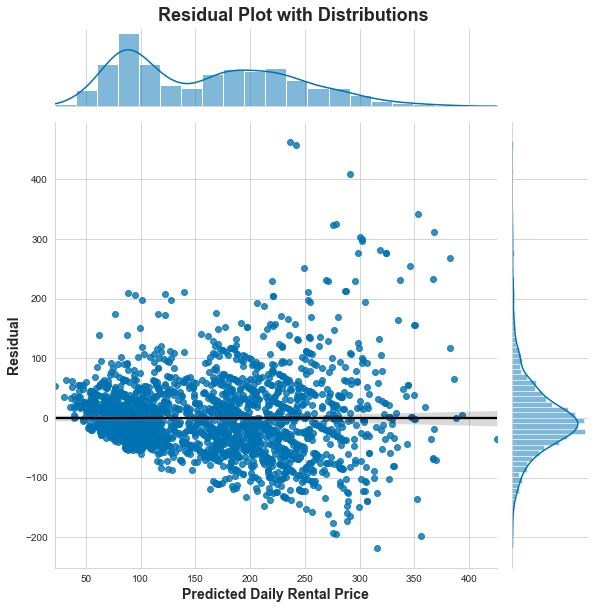

In [26]:
# Code Block 25
# Evaluate residuals and their distribution
plt.figure(figsize=(16,8))
sns.jointplot(x=pred, y=resid, kind="reg", ratio=5, height=8, 
              line_kws={'color': 'black'})
plt.xlabel('Predicted Daily Rental Price', fontweight='bold', fontsize='14', ha='center')
plt.ylabel('Residual', fontweight='bold', fontsize='14', ha='center')
plt.suptitle('Residual Plot with Distributions       ',  fontweight='bold', 
          fontsize='18', ha='center', y=1.02)
plt.show()

<a id="25"></a>
#### Parsing the Model due to Insignificant Features

In [27]:
# Code Block 26
# Drop most non-significant feature based on p-value from analysis
X = X.drop(['property_Villa'], axis=1)

In [28]:
# Code Block 27
# Fit regression model on data
reg = sm.OLS(y, sm.add_constant(X)).fit()

# Show summary statistics for regression
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     84.66
Date:                Thu, 11 Mar 2021   Prob (F-statistic):               0.00
Time:                        10:03:16   Log-Likelihood:                -12840.
No. Observations:                2306   AIC:                         2.576e+04
Df Residuals:                    2266   BIC:                         2.599e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       139.7795      7.321     19.092      0.000     125.422     154.137
Host Listings Count           0.0294      0.013      2.345      0.019       0.005       0.054
Bedrooms                     50.1911      2.410     20.827      0.000      45.465      54.917
Security Deposit              0.0614      0.012      4.983      0.000       0.037       0.086
Cleaning Fee                  0.1494      0.043      3.476      0.001       0.065       0.234
Extra People                  0.1374      0.084      1.642      0.101      -0.027       0.301
Minimum Nights               -1.4059      0.383     -3.673      0.000      -2.156      -0.655
Number Of Reviews            -0.0467      0.039     -1.191      0.234      -0.124       0.030
Reviews Per Month            -2.4079      0.764     -3.152      0.002      -3.906      -0.910
superhost_Yes                14.3782      3.896      3.691      0.000       6.739      22.018
verified_Yes                  4.1941      3.413      1.229      0.219      -2.499      10.887
property_Bed & Breakfast     10.1450     13.141      0.772      0.440     -15.625      35.915
property_Boat                56.5273     20.775      2.721      0.007      15.787      97.268
property_Condominium         13.5049      5.410      2.497      0.013       2.897      24.113
property_House               -9.2037      3.993     -2.305      0.021     -17.033      -1.374
property_Loft                34.7306     12.940      2.684      0.007       9.356      60.106
property_Townhouse           21.3925     10.406      2.056      0.040       0.986      41.799
room_Private room           -84.6588      3.888    -21.772      0.000     -92.284     -77.033
room_Shared room            -96.5088     12.360     -7.808      0.000    -120.747     -72.270
bed_Airbed                  -20.9305     15.550     -1.346      0.178     -51.424       9.563
bed_Couch                     5.3351     33.291      0.160      0.873     -59.950      70.620
bed_Futon                   -23.8235     10.635     -2.240      0.025     -44.679      -2.968
bed_Pull-out Sofa            -5.9197     13.986     -0.423      0.672     -33.346      21.506
instabook_Yes               -15.0725      3.810     -3.956      0.000     -22.544      -7.601
cancel_flexible              -1.7570      3.809     -0.461      0.645      -9.226       5.712
cancel_moderate               9.4961      3.259      2.914      0.004       3.106      15.886
cancel_super_strict_30       58.7100     10.604      5.537      0.000      37.916      79.504
citybins_Brookline            4.2949     28.787      0.149      0.881     -52.157      60.747
citybins_Cambridge           25.3330     26.309      0.963      0.336     -26.259      76.926
citybins_Charlestown         15.4216     21.518      0.717      0.474     -

In [29]:
# Code Block 28
# Drop features one-by-one if their p-value exceeds the standard (.05 in this case) that
# we are using to determine if te feature is related to the target variable. The list below is an
# agglomeration of that process.
X = X.drop(['citybins_Brookline', 'bed_Couch', 'bed_Pull-out Sofa', 'cancel_flexible',
            'Days Since Last Review', 'citybins_Charlestown', 'property_Bed & Breakfast', 'citybins_Cambridge',
            'Guests per Bed', 'verified_Yes', 'Number Of Reviews', 'citybins_Jamaica Plain',
            'bed_Airbed', 'Extra People'], axis=1)

In [30]:
# Code Block 29
# Fit regression model on final set of uncorrelated and significant features
reg = sm.OLS(y, sm.add_constant(X)).fit()

# Create predictions and store in a list
pred = reg.predict(sm.add_constant(X)) 

# Create residuals in a list
resid = reg.resid

# Show summary statistics for regression
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     131.6
Date:                Thu, 11 Mar 2021   Prob (F-statistic):               0.00
Time:                        10:05:20   Log-Likelihood:                -12846.
No. Observations:                2306   AIC:                         2.574e+04
Df Residuals:                    2280   BIC:                         2.589e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       138.5496      5.828     23.771      0.000     127.120     149.979
Host Listings Count           0.0321      0.012      2.651      0.008       0.008       0.056
Bedrooms                     50.6599      2.374     21.338      0.000      46.004      55.316
Security Deposit              0.0597      0.012      4.879      0.000       0.036       0.084
Cleaning Fee                  0.1636      0.042      3.886      0.000       0.081       0.246
Minimum Nights               -1.4046      0.380     -3.693      0.000      -2.150      -0.659
Reviews Per Month            -2.8918      0.687     -4.212      0.000      -4.238      -1.545
superhost_Yes                14.0141      3.776      3.711      0.000       6.609      21.419
property_Boat                58.7190     20.632      2.846      0.004      18.260      99.178
property_Condominium         14.1500      5.377      2.632      0.009       3.606      24.694
property_House               -9.0235      3.925     -2.299      0.022     -16.720      -1.327
property_Loft                35.6637     12.922      2.760      0.006      10.324      61.003
property_Townhouse           22.0344     10.369      2.125      0.034       1.700      42.369
room_Private room           -83.7540      3.772    -22.206      0.000     -91.150     -76.358
room_Shared room            -99.5688     10.773     -9.242      0.000    -120.695     -78.443
bed_Futon                   -23.0307     10.576     -2.178      0.030     -43.770      -2.292
instabook_Yes               -15.2139      3.774     -4.031      0.000     -22.615      -7.813
cancel_moderate              10.2564      2.978      3.444      0.001       4.416      16.096
cancel_super_strict_30       60.1201     10.092      5.957      0.000      40.330      79.910
citybins_Other              -18.4399      7.647     -2.411      0.016     -33.436      -3.444
Host Response Time Code      -7.6496      2.001     -3.822      0.000     -11.574      -3.725
Has Security Deposit        -16.0961      4.227     -3.808      0.000     -24.386      -7.806
Accommodates per Bathroom    -3.2343      1.292     -2.504      0.012      -5.767      -0.702
Near Fenway                  23.1992      7.202      3.221      0.001       9.075      37.323
Near Harbor                  46.1005      4.543     10.147      0.000      37.191      55.010
Near Historic                37.2755      5.119      7.281      0.000      27.236      47.315
==============================================================================
Omnibus:                      753.023   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4571.332
Skew:                           1.404   Prob(JB):                         0.00
Kurtosis:                       9.300   C

<Figure size 1152x576 with 0 Axes>

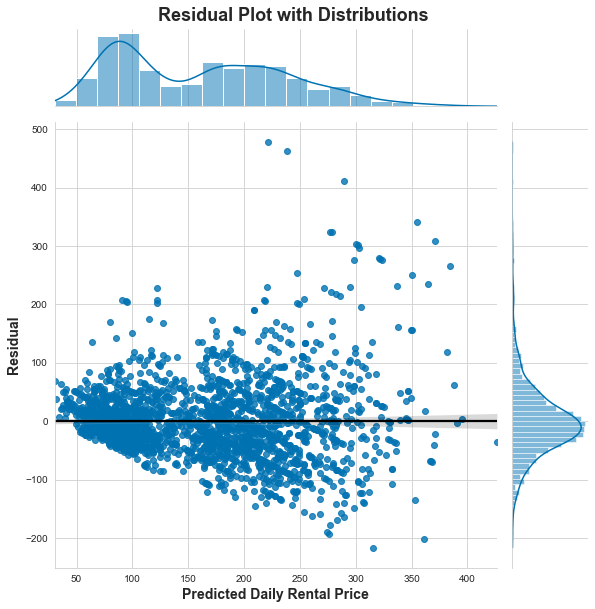

In [31]:
# Code Block 30
# Evalute residuals for final regression model
plt.figure(figsize=(16,8))
sns.jointplot(x=pred, y=resid, kind="reg", ratio=5, height=8, 
              line_kws={'color': 'black'})
plt.xlabel('Predicted Daily Rental Price', fontweight='bold', fontsize='14', ha='center')
plt.ylabel('Residual', fontweight='bold', fontsize='14', ha='center')
plt.suptitle('Residual Plot with Distributions       ',  fontweight='bold', 
          fontsize='18', ha='center', y=1.02)
plt.show()

<a id="26"></a>
#### Using the Final Model to Make Predictions

In [32]:
# Code Block 31
# Create empty copy of feature dataframe used in model
df_predNew = X.head(0).copy()

# Show column names to help input new observation for prediction
df_predNew.columns

Index(['Host Listings Count', 'Bedrooms', 'Security Deposit', 'Cleaning Fee',
       'Minimum Nights', 'Reviews Per Month', 'superhost_Yes', 'property_Boat',
       'property_Condominium', 'property_House', 'property_Loft',
       'property_Townhouse', 'room_Private room', 'room_Shared room',
       'bed_Futon', 'instabook_Yes', 'cancel_moderate',
       'cancel_super_strict_30', 'citybins_Other', 'Host Response Time Code',
       'Has Security Deposit', 'Accommodates per Bathroom', 'Near Fenway',
       'Near Harbor', 'Near Historic'],
      dtype='object')

In [33]:
# Code Block 32
# Create observation for the following prediction:
# This particular property is an apartment in Charlestown (near the Freedom Trail) with 3 bedrooms 
# and 2 bathrooms that is set to accommodate 6, which is the number of guests that are included. 
# The property host has 2 additional listings but is not a superhost. They require a security deposit
# of $250 and a cleaning fee of $100. There is a 3-night minimum on the property rental, which is for
# the entire apartment. Instant book is not available and the property has a strict cancellation policy.
# The property owner believes they will get 1.2 reviews per month and state that they respond to emails
# within a day (code is 2).

# Set up values in feature matrix to represent new property
df_predNew.loc[0] = [3, 3, 250, 100, 3, 1.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 3, 0, 0, 1]

# Check values to see if they align properly
display(df_predNew)

# Add a constant value as the first field in the dataframe
df_predNew = sm.add_constant(df_predNew, prepend=True, has_constant='add')

,Host Listings Count,Bedrooms,Security Deposit,Cleaning Fee,Minimum Nights,Reviews Per Month,superhost_Yes,property_Boat,property_Condominium,property_House,property_Loft,property_Townhouse,room_Private room,room_Shared room,bed_Futon,instabook_Yes,cancel_moderate,cancel_super_strict_30,citybins_Other,Host Response Time Code,Has Security Deposit,Accommodates per Bathroom,Near Fenway,Near Harbor,Near Historic
0,3.0,3.0,250.0,100.0,3.0,1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,3.0,0.0,0.0,1.0


In [34]:
# Code Block 33
# Create and show prediction results for new observation
prediction = reg.get_prediction(df_predNew)
prediction.summary_frame(alpha=.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,310.3999,7.1908,296.298705,324.501095,184.272187,436.527613


<a id="3"></a>
### A Data Science Approach to Regression Modeling
##### The focus is on the development of an "optimal" prediction model
<a href = "#99">Top</a>

<a id="30"></a>
#### Load New Packages and Set Up Data

In [36]:
# Code Block 34
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [37]:
# Code Block 35
# Re-create a dataframe with all fields to be used in the regression
df_reg = df_airbnb[['Host Listings Count', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds',
                    'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People', 
                    'Minimum Nights', 'superhost_Yes', 'verified_Yes', 'property_Bed & Breakfast',
                    'property_Boat', 'property_Condominium', 'property_House', 'property_Loft', 
                    'property_Townhouse', 'property_Villa', 'room_Private room', 'room_Shared room',
                    'bed_Airbed', 'bed_Couch', 'bed_Futon', 'bed_Pull-out Sofa', 'instabook_Yes', 
                    'cancel_flexible', 'cancel_moderate', 'cancel_super_strict_30', 'citybins_Brookline',
                    'citybins_Cambridge', 'citybins_Charlestown', 'citybins_Jamaica Plain',
                    'citybins_Other',  'Has Security Deposit', 'Guests per Bed', 'Accommodates per Bathroom', 
                    'Near Fenway', 'Near Harbor', 'Near Historic', 'Price']].copy()

# Drop rows that are not complete (i.e. have missing values)
df_reg.dropna(inplace=True)

# Set up target dataframe
y = df_reg[['Price']].copy()
y.reset_index(drop=True, inplace=True) 

# Set up features dataframe
X = df_reg.drop(['Price'], axis=1)
X.reset_index(drop=True, inplace=True) 

In [38]:
# Code Block 36
# Set up scaler to put features on same basis
std_scaler = StandardScaler()

# Apply scaler to entirety of features
X_scaled = std_scaler.fit_transform(X)

<a id="31"></a>
#### Refine Model and Identify Important Features

In [39]:
# Code Block 37
# Define recursive elimination search using cross-validated folds and scoring
rfe = RFECV(estimator=LinearRegression(), step=1, cv=KFold(n_splits=10), scoring='neg_mean_absolute_error')

# Fit defined RFE model to scaled data
rfe_model = rfe.fit(X_scaled,y)

In [40]:
# Code Block 38
# Show binary results for inclusion of each feature in the data
rfe_model.support_

array([False,  True, False,  True, False,  True,  True, False, False,
        True,  True, False,  True, False,  True,  True, False, False,
        True,  True,  True, False, False,  True, False,  True, False,
        True,  True, False, False, False, False,  True,  True, False,
        True,  True,  True,  True])

In [41]:
# Code Block 39
# Get list of best features by apply binary results against original feature dataframe
X.columns[rfe_model.support_]

Index(['Accommodates', 'Bedrooms', 'Security Deposit', 'Cleaning Fee',
       'Minimum Nights', 'superhost_Yes', 'property_Bed & Breakfast',
       'property_Condominium', 'property_House', 'property_Villa',
       'room_Private room', 'room_Shared room', 'bed_Futon', 'instabook_Yes',
       'cancel_moderate', 'cancel_super_strict_30', 'citybins_Other',
       'Has Security Deposit', 'Accommodates per Bathroom', 'Near Fenway',
       'Near Harbor', 'Near Historic'],
      dtype='object')

In [42]:
# Code Block 40
# Use binary results to populate new feature dataframe with chosen features
X_rfe = X[X.columns[rfe_model.support_]]
X_rfe

,Accommodates,Bedrooms,Security Deposit,Cleaning Fee,Minimum Nights,superhost_Yes,property_Bed & Breakfast,property_Condominium,property_House,property_Villa,room_Private room,room_Shared room,bed_Futon,instabook_Yes,cancel_moderate,cancel_super_strict_30,citybins_Other,Has Security Deposit,Accommodates per Bathroom,Near Fenway,Near Harbor,Near Historic
0,2,1.0,0.0,75.0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0,1,0
1,4,1.0,500.0,100.0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,4.0,0,0,0
2,1,1.0,0.0,0.0,15,0,0,0,1,0,0,1,0,0,0,0,0,0,0.4,0,0,0
3,3,1.0,0.0,0.0,10,0,0,0,1,0,0,0,0,0,0,0,0,0,3.0,1,0,0
4,1,1.0,0.0,10.0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,1.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3239,1,1.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1.0,0,0,0
3240,4,1.0,0.0,0.0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0,0,0,0
3241,2,1.0,0.0,0.0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0,0,0
3242,2,0.0,0.0,15.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0,1,0


<a id="32"></a>
#### Utiltize Identified Features to Build and Evaluate Final Regression Model

In [43]:
# Code Block 41
# Fit regression model on RFE chosen set of features
reg = sm.OLS(y, sm.add_constant(X_rfe)).fit()

# Create predictions and store in a list
pred = reg.predict(sm.add_constant(X_rfe)) 

# Create residuals in a list
resid = reg.resid

# Show summary statistics for regression
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     169.7
Date:                Thu, 11 Mar 2021   Prob (F-statistic):               0.00
Time:                        10:47:53   Log-Likelihood:                -18377.
No. Observations:                3244   AIC:                         3.680e+04
Df Residuals:                    3221   BIC:                         3.694e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       128.2146      4.834     26.526      0.000     118.737     137.692
Accommodates                 25.2725      1.989     12.707      0.000      21.373      29.172
Bedrooms                     25.3968      2.814      9.026      0.000      19.880      30.913
Security Deposit              0.0741      0.011      6.913      0.000       0.053       0.095
Cleaning Fee                  0.1028      0.036      2.838      0.005       0.032       0.174
Minimum Nights               -1.0280      0.340     -3.025      0.003      -1.694      -0.362
superhost_Yes                 9.6818      3.895      2.486      0.013       2.045      17.318
property_Bed & Breakfast     31.7421     12.095      2.625      0.009       8.028      55.456
property_Condominium         14.0594      5.022      2.799      0.005       4.212      23.907
property_House              -17.3379      3.745     -4.629      0.000     -24.681      -9.994
property_Villa               64.4278     28.721      2.243      0.025       8.115     120.741
room_Private room           -73.1528      3.508    -20.855      0.000     -80.030     -66.275
room_Shared room            -75.3739      9.621     -7.834      0.000     -94.239     -56.509
bed_Futon                   -23.9964     10.163     -2.361      0.018     -43.923      -4.070
instabook_Yes               -15.9108      3.392     -4.691      0.000     -22.561      -9.261
cancel_moderate               7.0191      2.810      2.498      0.013       1.510      12.528
cancel_super_strict_30       88.6494      8.812     10.060      0.000      71.372     105.927
citybins_Other              -20.2234      7.177     -2.818      0.005     -34.295      -6.152
Has Security Deposit        -20.1612      3.928     -5.132      0.000     -27.863     -12.459
Accommodates per Bathroom   -18.8447      1.780    -10.587      0.000     -22.335     -15.355
Near Fenway                  21.0111      5.958      3.526      0.000       9.329      32.693
Near Harbor                  41.3178      4.222      9.786      0.000      33.039      49.596
Near Historic                33.6818      5.009      6.724      0.000      23.861      43.503
==============================================================================
Omnibus:                     1347.216   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11072.592
Skew:                           1.762   Prob(JB):                         0.00
Kurtosis:                      11.337   Cond. No.                     4.99e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.99e+03. This might indicate 

In [ ]:
# Code Block 42
# Evalute residuals for RFE regression model
plt.figure(figsize=(16,8))
sns.jointplot(x=pred, y=resid, kind="reg", ratio=5, height=8, 
              line_kws={'color': 'black'})
plt.xlabel('Predicted Daily Rental Price', fontweight='bold', fontsize='14', ha='center')
plt.ylabel('Residual', fontweight='bold', fontsize='14', ha='center')
plt.suptitle('Residual Plot with Distributions       ',  fontweight='bold', 
          fontsize='18', ha='center', y=1.02)
plt.show()

In [44]:
# Code Block 43
# Evaluate Variance Inflation Factor for X features in RFE set
# Note: That VIF Scores are not concerning as we are not focused on individual
# relationships in the regression model, just the prediction ... which is relatively
# unaffected by multicollinearity
vif = pd.DataFrame()
vif["Feature"] = X_rfe.columns
vif["VIF Score"] = [variance_inflation_factor(X_rfe.values, i) for i in range(X_rfe.shape[1])]

# Show features with VIF above 5
index_names = vif[vif['VIF Score'] < 5 ].index
vif.drop(index_names, inplace=True)
round(vif, 1).sort_values(by='VIF Score', ascending=False)

,Feature,VIF Score
0,Accommodates,29.0
18,Accommodates per Bathroom,15.2
1,Bedrooms,9.8


<a id="33"></a>
#### Using the Final Model to Make Predictions

In [45]:
# Code Block 44
# Create empty copy of feature dataframe used in RFE model
df_predNew = X_rfe.head(0).copy()

# Show column names to help input new observation for prediction
df_predNew.columns

Index(['Accommodates', 'Bedrooms', 'Security Deposit', 'Cleaning Fee',
       'Minimum Nights', 'superhost_Yes', 'property_Bed & Breakfast',
       'property_Condominium', 'property_House', 'property_Villa',
       'room_Private room', 'room_Shared room', 'bed_Futon', 'instabook_Yes',
       'cancel_moderate', 'cancel_super_strict_30', 'citybins_Other',
       'Has Security Deposit', 'Accommodates per Bathroom', 'Near Fenway',
       'Near Harbor', 'Near Historic'],
      dtype='object')

In [46]:
# Code Block 45
# Create observation for the following prediction:
# This particular property is an apartment in Charlestown (near the Freedom Trail) with 3 bedrooms 
# and 2 bathrooms that is set to accommodate 6, which is the number of guests that are included. 
# The property host has 2 additional listings but is not a superhost. They require a security deposit
# of $250 and a cleaning fee of $100. There is a 3-night minimum on the property rental, which is for
# the entire apartment. Instant book is not available and the property has a strict cancellation policy.
# The property owner believes they will get 1.2 reviews per month and state that they respond to emails
# within a day (code is 2).

# Set up values in feature matrix to represent new property
df_predNew.loc[0] = [6, 3, 250, 100, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 1]

# Add a constant value as the first field in the dataframe
df_predNew = sm.add_constant(df_predNew, prepend=True, has_constant='add')

# Check values to see if they align properly
df_predNew

,const,Accommodates,Bedrooms,Security Deposit,Cleaning Fee,Minimum Nights,superhost_Yes,property_Bed & Breakfast,property_Condominium,property_House,property_Villa,room_Private room,room_Shared room,bed_Futon,instabook_Yes,cancel_moderate,cancel_super_strict_30,citybins_Other,Has Security Deposit,Accommodates per Bathroom,Near Fenway,Near Harbor,Near Historic
0,1.0,6,3.0,250.0,100.0,3,0,0,0,0,0,0,0,0,0,0,0,0,1,3.0,0,0,1


In [47]:
# Code Block 46
# Create and show RFE prediction results for new observation
prediction_rfe = reg.get_prediction(df_predNew)
prediction_rfe.summary_frame(alpha=.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,338.754799,6.677026,325.663148,351.846449,200.744974,476.764623


<a id="4"></a>
### Assignment Submission
<a href = "#99">Top</a>

## Python Assignment 6
### Name: Mark Lowe

In [48]:
# Show statistical and data science regression model prediction results for new observation
print('Results from Statistical Regression Model')
display(prediction.summary_frame(alpha=.05))
print('\nResults from Data Science Regression Model')
prediction_rfe.summary_frame(alpha=.05)

Results from Statistical Regression Model


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,310.3999,7.1908,296.298705,324.501095,184.272187,436.527613



Results from Data Science Regression Model


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,338.754799,6.677026,325.663148,351.846449,200.744974,476.764623


#### Your comments on which regression model you prefer and why.
> I think the Data Science regression model is better because it uses every feature available and therefore avoids missing important variables that may be thrown out in a statistical model because the person running the model did not think the variable was connected. The Data Science regression model is also easier to create and allows a person to have a greater predictive ability by using cross validation and letting a person choose which "scoring" option they want to use for the model.

In [49]:
print(datetime.datetime.now().isoformat())
print("Your Computer Name is: " + socket.gethostname())
print("Your Computer IP Address is: " + socket.gethostbyname(socket.gethostname()))

2021-03-11T11:09:30.808906
Your Computer Name is: DESKTOP-7PJ8THV
Your Computer IP Address is: 192.168.1.121
